Warning message:
"package 'forecast' was built under R version 3.6.3"
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Warning message:
"package 'urca' was built under R version 3.6.3"



####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 5 lags. 

Value of test-statistic is: 4.0009 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


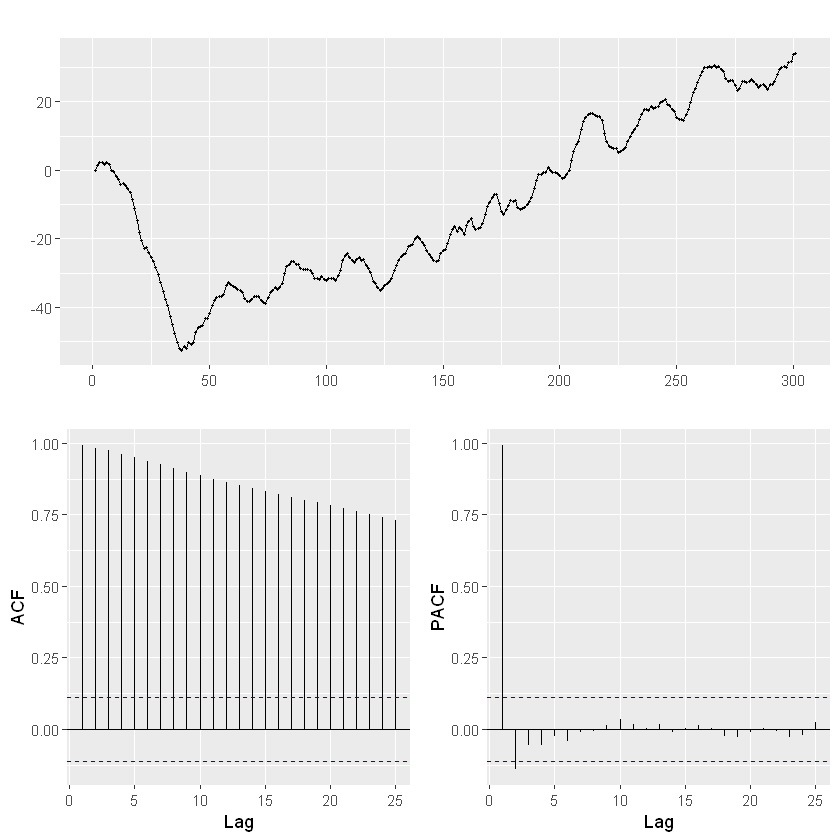

In [1]:
library(forecast)
library(ggplot2)
library(urca)

set.seed(1234)
arima_1_1_1 <- arima.sim(model=list(order=c(1,1,1),ar=0.7,ma=-0.2), n=300)
ggtsdisplay(arima_1_1_1)
summary(ur.kpss(arima_1_1_1))


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: mu with 5 lags. 

Value of test-statistic is: 0.5741 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.347 0.463  0.574 0.739


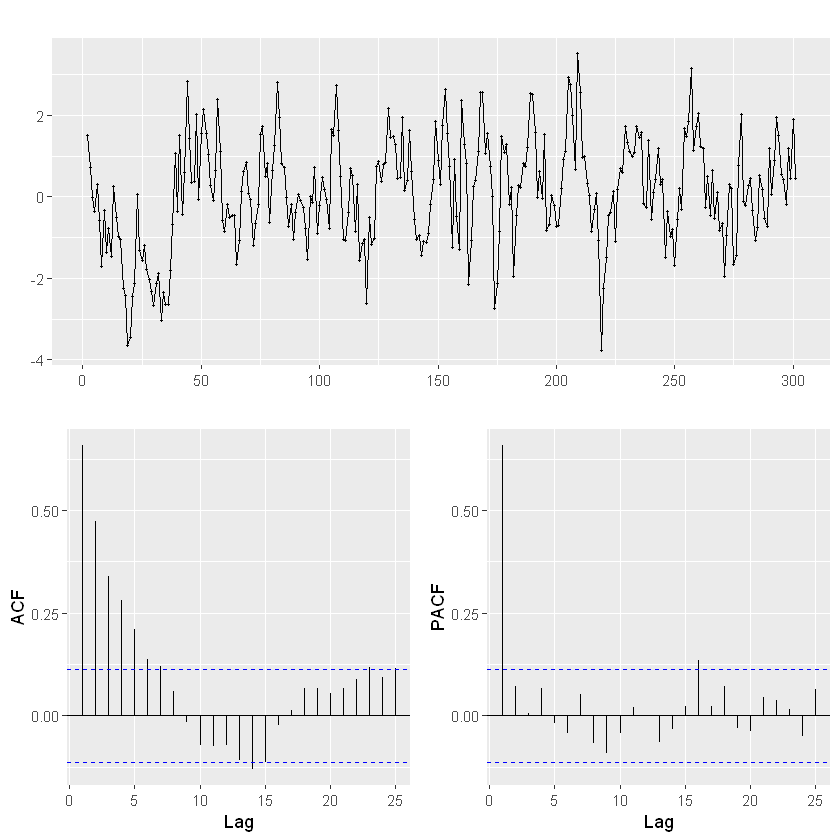

In [4]:
arima_d <- diff(arima_1_1_1)

ggtsdisplay(arima_d)
summary(ur.kpss(arima_d))

차분 이후에 정상성을 갖는 것을 알 수 있습니다.
원데이터의 경우 kpss 검정통계량이 1퍼 유의수준보다 컸기 때문에 귀무가설 "정상시계열이다"를 기각했었지만, 차분 이후에는 검정통계량이 1퍼 유의수준보다 작아졌으므로 귀무가설을 채택합니다.

원데이터를 가지고 ARIMA(1,1,0)을 해볼 수도 있겠지만
대안 모형인 ARIMA(1,1,1)로 학습을 진행해보겠습니다.
원데이터를 가지고 하셔야합니다!!

차분한 데이터로 가게 되면 차분 2차가 되버리니 주의해주세요.


	Ljung-Box test

data:  Residuals from ARIMA(1,1,1)
Q* = 6.7601, df = 8, p-value = 0.5627

Model df: 2.   Total lags used: 10



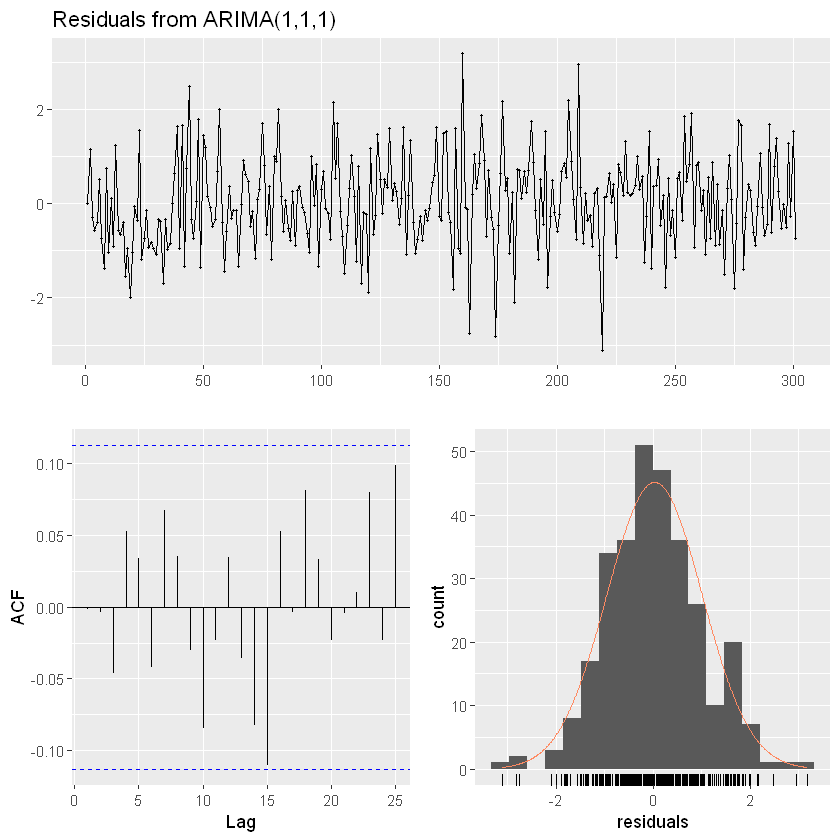

In [5]:
# 모형적합
arima_fit <- Arima(arima_1_1_1, order=c(1,1,1))
# 잔차확인
checkresiduals(arima_fit)


Forecast method: ARIMA(1,1,1)

Model Information:
Series: arima_1_1_1 
ARIMA(1,1,1) 

Coefficients:
         ar1      ma1
      0.7248  -0.1124
s.e.  0.0604   0.0884

sigma^2 estimated as 0.9781:  log likelihood=-421.64
AIC=849.29   AICc=849.37   BIC=860.4

Error measures:
                     ME      RMSE       MAE      MPE     MAPE      MASE
Training set 0.03516913 0.9840252 0.7739969 45.50617 63.99394 0.7348889
                     ACF1
Training set -0.001669357

Forecasts:
    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
302       34.56598 33.29857 35.83339 32.62764 36.50431
303       34.86382 32.45913 37.26851 31.18616 38.54148
304       35.07969 31.53365 38.62573 29.65649 40.50288
305       35.23614 30.58238 39.88990 28.11883 42.35346
306       35.34953 29.63910 41.05997 26.61618 44.08289
307       35.43171 28.72173 42.14170 25.16968 45.69375
308       35.49128 27.83904 43.14351 23.78819 47.19436
309       35.53445 26.99455 44.07434 22.47381 48.59508
310       35.56573 26.

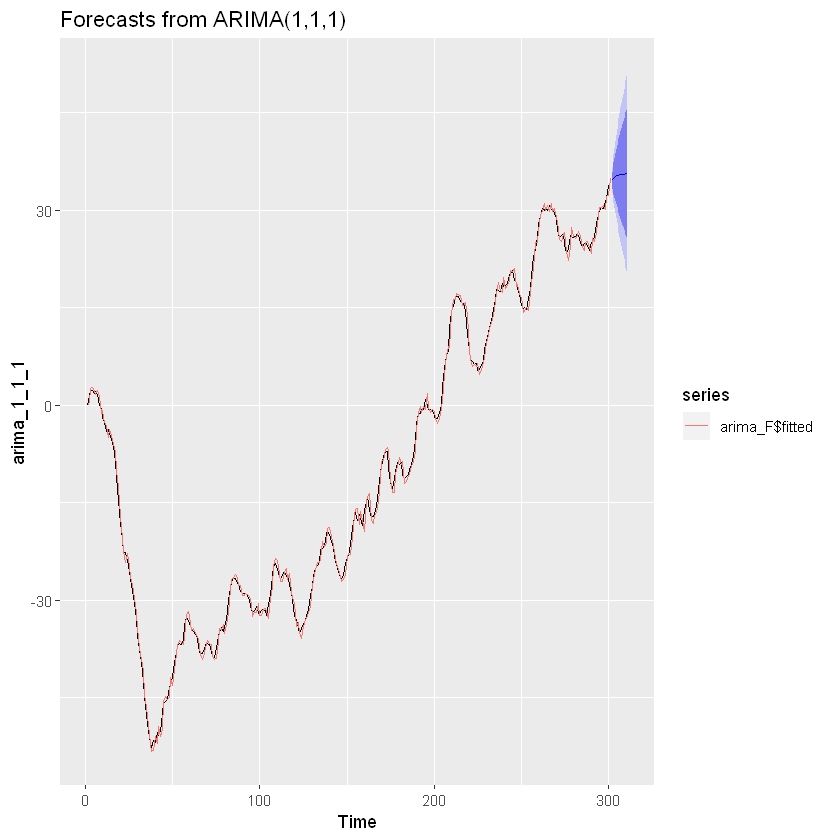

In [7]:
# ARIMA 모형 시뮬레이션
arima_F <- forecast(arima_fit)
autoplot(arima_F) + autolayer(arima_F$fitted)

summary(arima_F)

원데이터로 돌려놓고 그려주는 것을 확인할 수 있습니다.
rmse 값을 구할 때에도 원데이터하고 차이값을 구하게됩니다.
Y-Y햇이요!

Arima(1,1,0)으로도 한번 적합시켜보겠습니다


	Ljung-Box test

data:  Residuals from ARIMA(1,1,0)
Q* = 8.1592, df = 9, p-value = 0.5182

Model df: 1.   Total lags used: 10



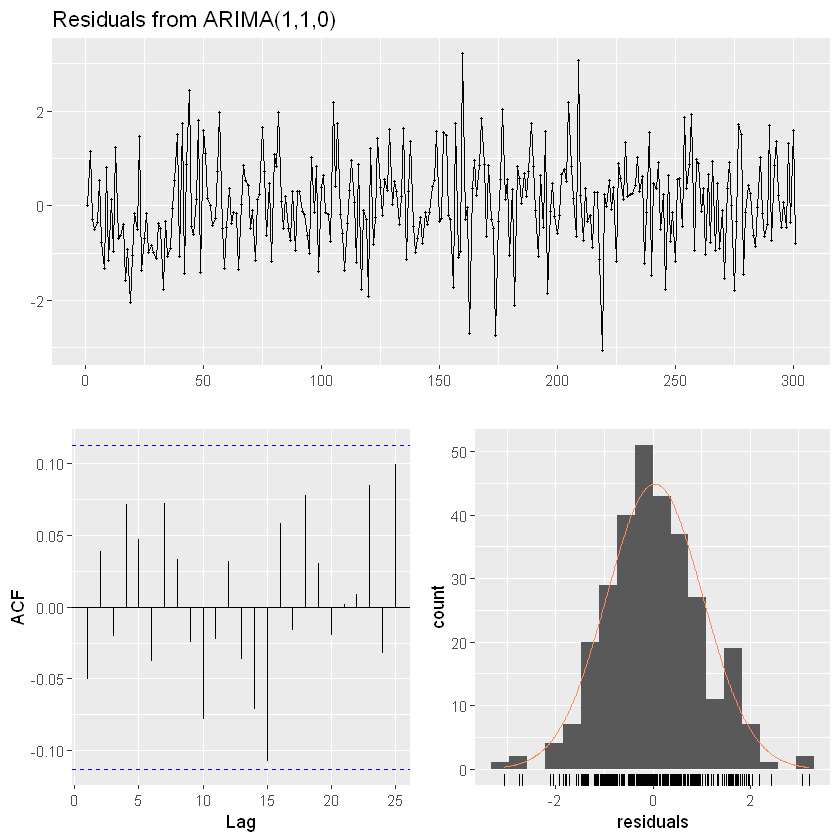

In [8]:
# 모형적합
arima_fit2 <- Arima(arima_1_1_1, order=c(1,1,0))
# 잔차확인
checkresiduals(arima_fit2)


Forecast method: ARIMA(1,1,0)

Model Information:
Series: arima_1_1_1 
ARIMA(1,1,0) 

Coefficients:
         ar1
      0.6621
s.e.  0.0431

sigma^2 estimated as 0.9801:  log likelihood=-422.45
AIC=848.9   AICc=848.94   BIC=856.3

Error measures:
                     ME      RMSE       MAE      MPE     MAPE      MASE
Training set 0.03806468 0.9866853 0.7758803 47.62324 65.47506 0.7366771
                   ACF1
Training set -0.0504315

Forecasts:
    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
302       34.45392 33.18521 35.72263 32.51360 36.39425
303       34.65184 32.19083 37.11285 30.88805 38.41563
304       34.78289 31.15536 38.41041 29.23507 40.33071
305       34.86966 30.14102 39.59831 27.63782 42.10150
306       34.92712 29.17384 40.68040 26.12823 43.72600
307       34.96516 28.26256 41.66777 24.71441 45.21591
308       34.99035 27.40772 42.57299 23.39371 46.58700
309       35.00703 26.60614 43.40792 22.15898 47.85508
310       35.01808 25.85321 44.18294 21.00163 49.03453

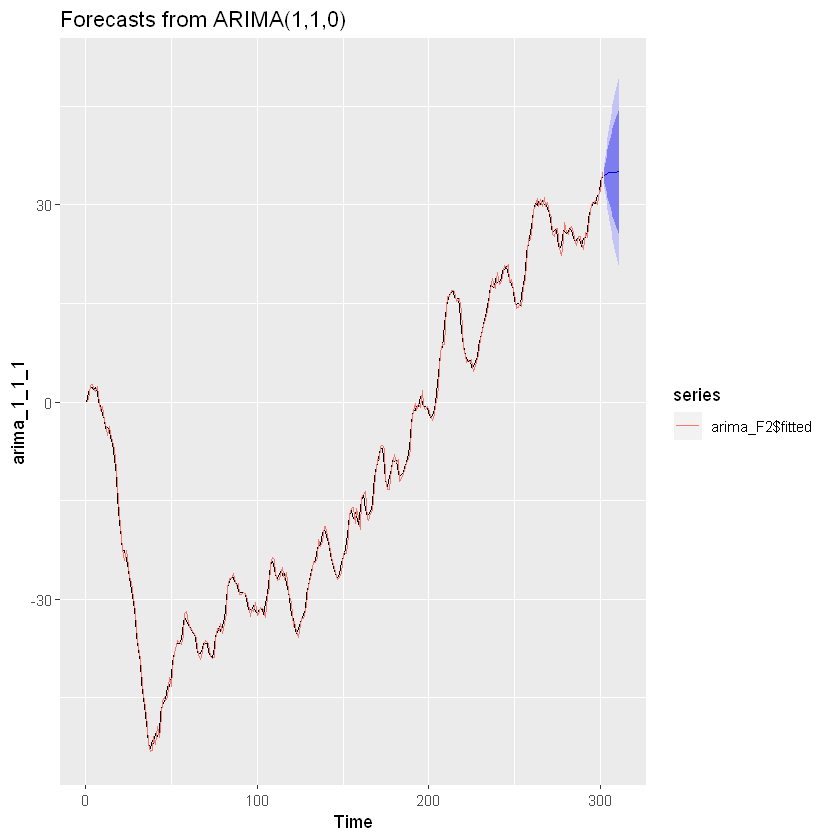

In [9]:
# ARIMA 모형 시뮬레이션
arima_F2 <- forecast(arima_fit2)
autoplot(arima_F2) + autolayer(arima_F2$fitted)

summary(arima_F2)